In [7]:
import os
import shutil
import tensorflow as tf
# from pyunpack import Archive

BASE_DIR = "france/"

path = BASE_DIR + "gz_files/"
tf_out_path = BASE_DIR + "tf_files/"

# if os.path.exists(tf_out_path):
#     print("Removing Existing Directory.....")
#     shutil.rmtree(tf_out_path)

# print("Creating TFRECORD Exctract Directory.....")
# os.makedirs(tf_out_path)
    
# gz_files = os.listdir(path)

# for i in gz_files:
#     Archive(path+i).extractall(tf_out_path)

# print(">>>>>>>>>> Extraction Complete <<<<<<<<<<<<")
    
img_out_path = BASE_DIR + "images/"
if os.path.exists(img_out_path):
    print("Removing Existing Image Directory.....")
    shutil.rmtree(img_out_path)

print("Creating IMAGE Exctract Directory.....")
os.makedirs(img_out_path)
    

tf_files = os.listdir(tf_out_path)


>>>>>>>>>> Extraction Complete <<<<<<<<<<<<
Creating IMAGE Exctract Directory.....


In [8]:
tf_files

['france_s2_patches-00025.tfrecord', 'france_s2_patches-00026.tfrecord']

In [9]:
tf_file = tf_out_path + tf_files[0]
print(">>>>>> Processing: " + tf_file)

>>>>>> Processing: france/tf_files/france_s2_patches-00025.tfrecord


In [10]:
options = tf.compat.v1.python_io.TFRecordOptions(tf.compat.v1.python_io.TFRecordCompressionType.NONE)

In [11]:

# for tf_file in tf_files:

iterator = tf.compat.v1.python_io.tf_record_iterator(tf_file, options=options)
print(iterator)
#     n = 0

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [13]:
import csv
n = 0
print(tf_file)
iter = 10
csv_file = img_out_path  + "img_csv.csv"
csv_file_keys = ['Parcel_id', 'max_lat', 'max_lon', 'min_lat', 'min_lon']
with open(csv_file, 'w') as f_csv:
    csv_writer = csv.writer(f_csv)
    csv_writer.writerow(csv_file_keys)

france/tf_files/france_s2_patches-00025.tfrecord


In [14]:
record_str = next(iterator)

In [16]:
ex = tf.train.Example.FromString(record_str)

In [19]:
idx = 0
min_lon = min(ex.features.feature['longitude'].float_list.value) 
max_lon = max(ex.features.feature['longitude'].float_list.value) 
min_lat = min(ex.features.feature['latitude'].float_list.value) 
max_lat = max(ex.features.feature['latitude'].float_list.value) 
idx = idx + 1#int(ex.features.feature['Parcel_id'].float_list.value[0])

In [25]:
csv_writer = csv.writer(f_csv)

In [27]:
import numpy as np
satellite_features = ['B2', 'B3', 'B4']

features = []
for satellite_feature in satellite_features:
    feature = (ex.features.feature[satellite_feature].float_list.value)
    feature = np.array(feature)
    feature = feature.reshape((224, 224, 1))
    feature = np.flip(feature, axis=0)
    features.append(feature)

with open(csv_file, 'w') as f_csv:
    csv_writer = csv.writer(f_csv)
    csv_writer.writerow([idx, max_lat*10000, max_lon*10000, min_lat*10000, min_lon*10000])
image = np.concatenate(features, axis=2)
# image = image[:223, :223, :]

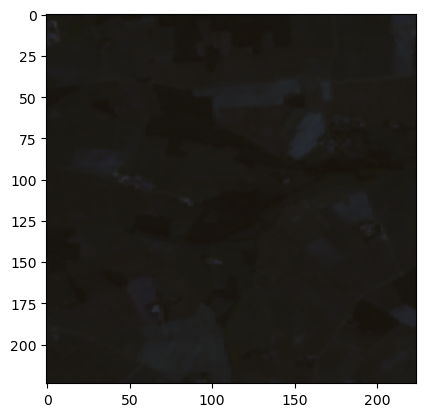

In [46]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [47]:
gz_files = os.listdir(path)

In [48]:
gz_files

['france_s2_patches-00026.tfrecord.gz', 'france_s2_patches-00025.tfrecord.gz']

In [49]:
dataset = tf.data.TFRecordDataset(path+gz_files[0], compression_type='GZIP')

2023-05-08 16:12:50.438240: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 16:12:55.105841: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7922 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB MIG 1g.10gb, pci bus id: 0000:01:00.0, compute capability: 8.0


In [52]:
# Define the feature description for parsing the example
feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string),
    # Add more features if present in your TFRecord file
}

# Function to parse the TFRecord example
def parse_example(example_proto):
    # Parse the example using the feature description
    feature_dict = tf.io.parse_single_example(example_proto, feature_description)
    
    # Decode the image feature from bytes to tensor
    image = tf.io.decode_jpeg(feature_dict['image'], channels=3)  # Modify if using a different image format
    
    return image

# Parse the TFRecord dataset
parsed_dataset = dataset.map(parse_example)

In [66]:
dataset.random()

AttributeError: 'RandomDataset' object has no attribute 'content'

In [56]:
# Iterate over the parsed dataset to extract the images
for image in parsed_dataset:
    # Process or save the image as per your requirements
    # Example: Display the image using matplotlib
    import matplotlib.pyplot as plt
    plt.imshow(image)
    break

2023-05-08 16:15:11.598782: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: image (data type: string) is required but could not be found.
2023-05-08 16:15:11.601251: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: image (data type: string) is required but could not be found.
2023-05-08 16:15:11.603571: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: image (data type: string) is required but could not be found.
2023-05-08 16:15:11.605267: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: image (data type: string) is required but could not be found.
2023-05-08 16:15:11.607566: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: F

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} Feature: image (data type: string) is required but could not be found.
	 [[{{node ParseSingleExample/ParseExample/ParseExampleV2}}]] [Op:IteratorGetNext]